       age  workclass  education.num  marital.status  occupation  \
0       90          0              9               6           0   
1       82          4              9               6           4   
2       66          0             10               6           0   
3       54          4              4               0           7   
4       41          4             10               5          10   
...    ...        ...            ...             ...         ...   
32556   22          4             10               4          11   
32557   27          4             12               2          13   
32558   40          4              9               2           7   
32559   58          4              9               6           1   
32560   22          4              9               4           1   

       relationship  race  sex  capital.gain  capital.loss  hours.per.week  
0                 1     4    0             0          4356              40  
1                 1     4    

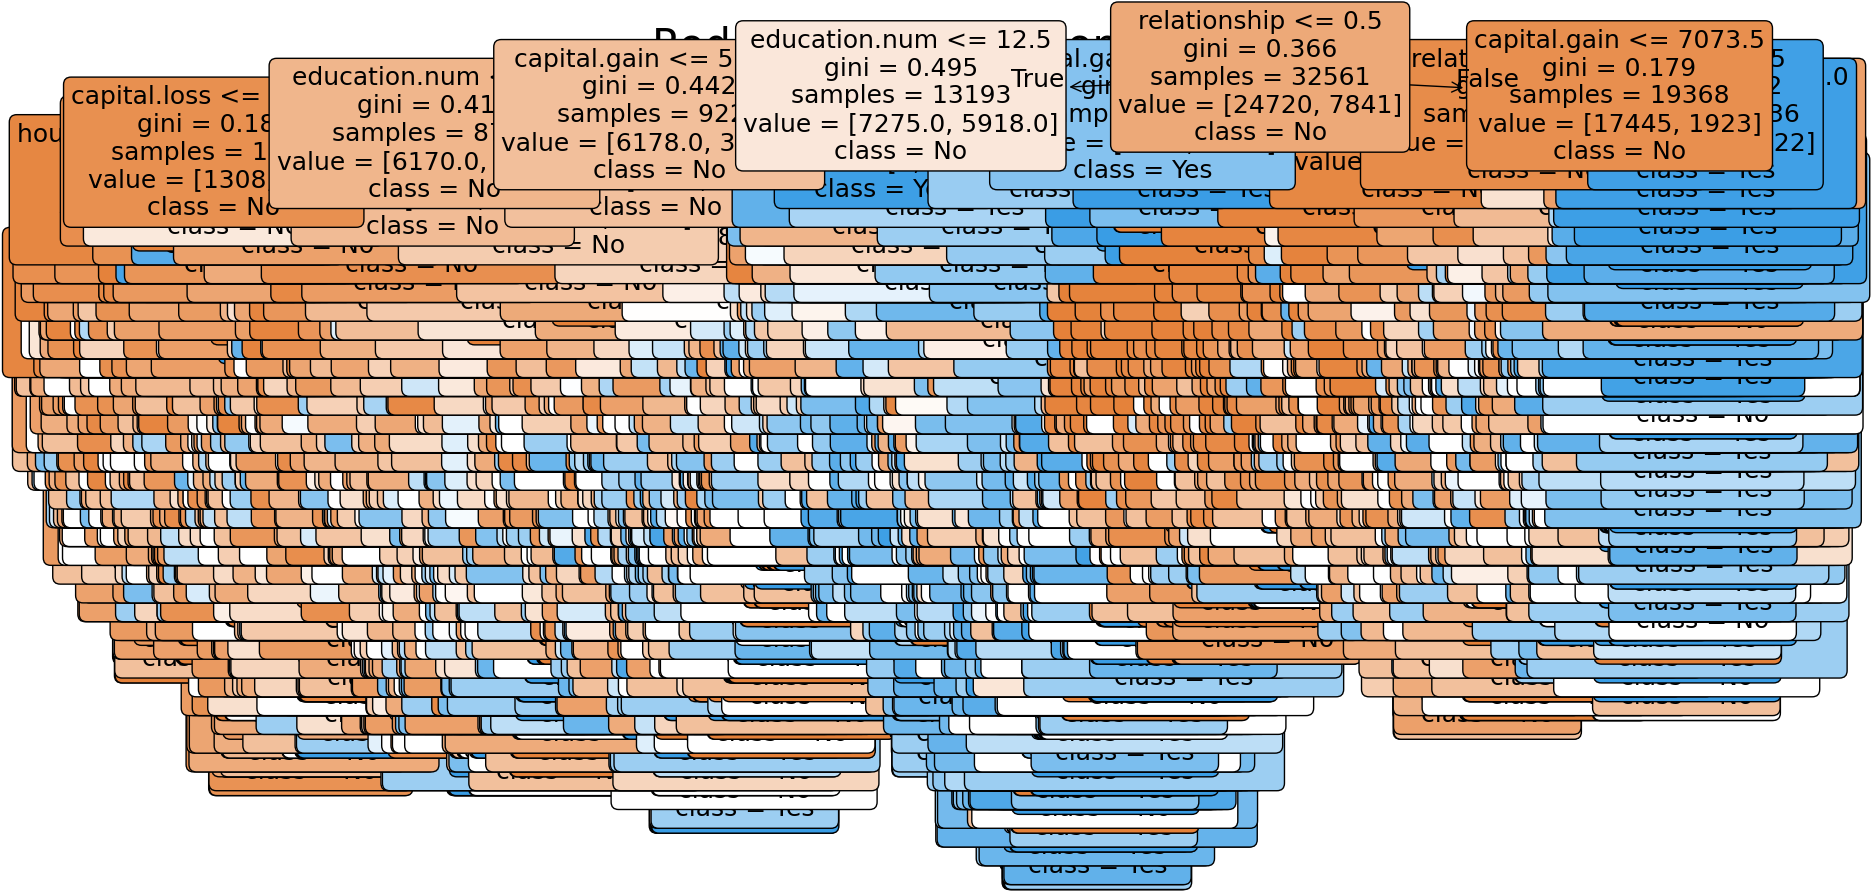


Feature Importances:
           feature  importance
5     relationship    0.218174
0              age    0.174282
2    education.num    0.147966
8     capital.gain    0.129988
10  hours.per.week    0.105884
4       occupation    0.085228
1        workclass    0.052566
9     capital.loss    0.044720
6             race    0.023650
3   marital.status    0.011255
7              sex    0.006286


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('./Datasets/adult.csv', comment = '#')

# First, create a copy of the dataframe to avoid modifying the original
df_encoded = df.copy()

# Apply label encoding to categorical columns
label_encoder = LabelEncoder()
categorical_columns = ['workclass', 'marital.status', 'occupation', 
                      'relationship', 'race', 'sex', 'income']

for column in categorical_columns:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

# Now properly separate features and target
X = df_encoded.drop(columns=['income', 'native.country', 'education','fnlwgt'])
y = df_encoded['income']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(X)

# Create and train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# Visualize the tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], 
          filled=True, rounded=True, fontsize=18)
plt.title("Rod Breaking Decision Tree",fontsize=30)
plt.show()

# Print feature importances
importances = pd.DataFrame({
    'feature': X.columns,
    'importance': clf.feature_importances_
})
print("\nFeature Importances:")
print(importances.sort_values('importance', ascending=False))

